# Contents
<pre></pre>
<font size=+1>

[Useful Functions](#Useful-Functions)<pre></pre>
[Data Prep](#Data-Prep)<pre></pre>
[Modeling](#Modeling)<pre></pre>
[Linear Regression](#Linear-Regression)<pre></pre>
[Validate Linear Regression](#Validate-Linear-Regression)<pre></pre>
[Logistic Regression](#Logistic-Regression)<pre></pre>
[Validate Logistic Regression](#Validate-Logistic-Regression)<pre></pre>
[Random Forest](#Random-Forest)<pre></pre>

</font>

# Useful Functions

## Function to Magnify any Dataframe

In [1]:
from IPython.display import HTML

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

def magnify_df(df):
    styles = [
    dict(selector="th",props=[("font-size", "15pt")]),
    dict(selector="td",props=[('padding', "0em 0em")]),
    dict(selector="th:hover",props=[("font-size", "15pt")]),
    dict(selector="tr:hover td:hover",props=[('max-width', '200px'),('font-size', '15pt')])
    ]
    return(df.style.set_table_styles(styles).set_caption("Hover to highlight."))

## Function to Create Correlation Plot

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   
sns.set(rc={'figure.figsize':(10,13)}, font_scale = 2)

def correlation_plot(df, target_col_name):
    corr = df.loc[:, df.columns != target_col_name].corr()
    plt.figure(figsize=(20,13))
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.set_context("paper", font_scale=2)
    plt.title('Variables of Interest in our Analysis', fontsize=40)
    correlation_plot = sns.heatmap(df.loc[:, df.columns != target_col_name].corr(), annot=False, linewidth=.5, cmap="coolwarm", mask=mask)
    return correlation_plot

## Function to Create Confusion Matrix Visualization

In [3]:
from sklearn.metrics import confusion_matrix

#This creates confusion matrix visualization
import matplotlib.pylab as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

# Data Prep
[Go back to the Table of Contents](#Contents)

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data.drop('Unnamed: 0', 1, inplace=True)
cleaned_data.rename({'y_yes': 'subscribed_deposit'}, axis=1, inplace=True)
cleaned_data.isna().sum()

subscribed_deposit     0
age                    0
balance                0
duration               0
campaign               0
previous               0
marital_married        0
marital_single         0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
education_secondary    0
education_tertiary     0
default_yes            0
housing_yes            0
loan_yes               0
dtype: int64

### Code For One Hot Encoding Categorical Variables

In [5]:
#Get one hot encoded values for independent categorical variables
#merge one hot encoded variables with independent numeric variables

# X_enc = pd.get_dummies(df_clean[['marital', 'job', 'education', 'default', 'housing', 'loan', 'y']], drop_first= True)

# numeric_data = df_clean[['age', 'balance', 'duration', 'campaign', 'previous']]
    
# cleaned_data_merge = pd.merge(numeric_data, X_enc, how = 'left', left_index=True, right_index=True)

### Omitted Categories for one hot encoded variables

In [6]:
#Marital - Divorced
#Jobs - admin
#Education - primary
#default - no
#housing - no
#loan - no

# Modeling
[Go back to the Table of Contents](#Contents)

### Correlation plot

<AxesSubplot:title={'center':'Variables of Interest in our Analysis'}>

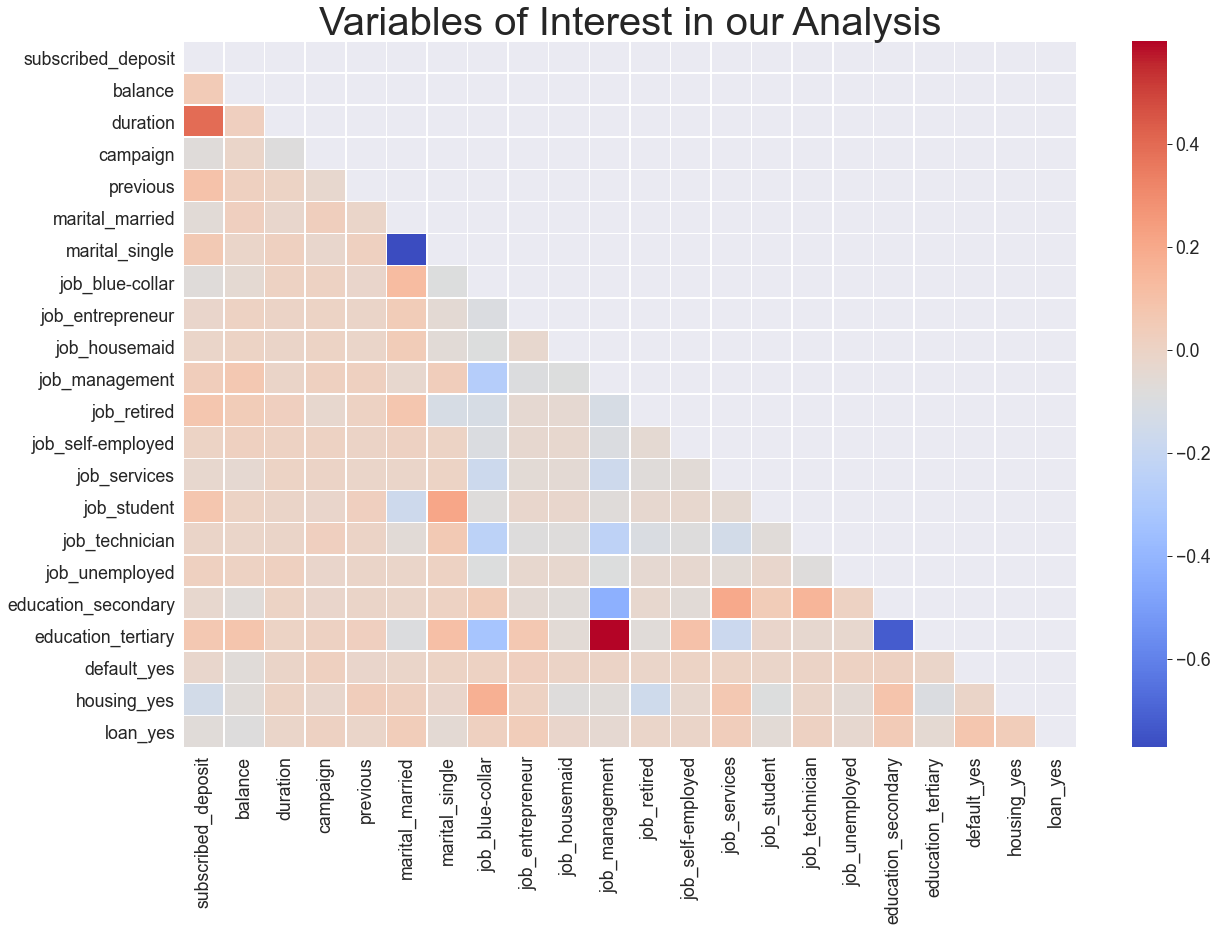

In [7]:
correlation_plot(cleaned_data, 'age')

# Linear Regression
[Go back to the Table of Contents](#Contents)

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np 
import statsmodels.api as sm 
import pylab as py
from sklearn.model_selection import cross_val_score
import statistics
sns.set(rc={'figure.figsize':(10,13)}, font_scale = 2)
  

def Basic_Linear_Regression(df, target_col_name, test_size):
    cleaned_data_y = df.loc[:, cleaned_data.columns == target_col_name]
    cleaned_data_x = df.loc[:, cleaned_data.columns != target_col_name]

    x_train, x_test, y_train, y_test = train_test_split(cleaned_data_x, cleaned_data_y, test_size=test_size, random_state= 1254)

    #Regression RMSE
    # Train the model
    lm = LinearRegression()
    lm.fit(x_train, y_train)

    y_pred = lm.predict(x_test)

    # Compute the root-mean-square

    lm = LinearRegression()
    lm.fit(x_train, y_train)

    MSEs = cross_val_score(lm, x_train, y=y_train, scoring='neg_mean_squared_error', cv=int((1/test_size)))
    RMSE = (MSEs*-1)**0.5
    
    print('\n')
    print('Basic Linear Regression Average Training RMSE:')
    print('\n')
    print(statistics.mean(RMSE))
    print('\n')
    print('RMSE for each Training fold:')
    print('\n')
    print(RMSE)
    print('\n')
    # Compute the root-mean-square
    RMSE_testing = np.sqrt(mean_squared_error(y_test, y_pred))
    print('\n')
    print('Basic Linear Regression Tested RMSE Score:')
    print('\n')
    print(RMSE_testing)
    print('\n')
    
    #Regression Model
    x_train = sm.add_constant(x_train)# adding a constant
    x_test = sm.add_constant(x_test)
    model=sm.OLS(y_train, x_train).fit()
    print(model.summary())
    
    pvalues_df = pd.DataFrame(model.pvalues)
    pvalues_df.reset_index(inplace=True)
    pvalues_df.rename(columns={"index": "Variables", 0: "Pvalues"}, inplace=True)

    #Creates new dataframe for all significant variables
    df_not_significant = pvalues_df.loc[pvalues_df['Pvalues'] > .05]
    df_not_significant['Pvalues'] = df_not_significant['Pvalues'].apply(lambda x: '%.5f' % x)
    print('\n')
    print('These Are the Linear Regression Variables That are not significant:')
    print('\n')
    print(df_not_significant)
    
    coefficients_df = pd.DataFrame(model.params)
    coefficients_df.reset_index(inplace=True)
    coefficients_df.rename(columns={"index": "Variables", 0: "Absolute_Coefficients"}, inplace=True)
    coefficients_df['Absolute_Coefficients'] = abs(coefficients_df['Absolute_Coefficients'])
    coefficients_df.sort_values(by=["Absolute_Coefficients"], ascending=False, inplace=True)
    Feature_Importance = sns.barplot(x="Absolute_Coefficients", y="Variables", data=coefficients_df)
    
    print('\n')
    print('Figure Showing Relative Variable Coefficients, Remember Some Are Continuous:')
    print('\n')
    return Feature_Importance
    
    
    print('\n')
    print('This is a plot of the Regression fitting  Test Data:')
    print('\n')
    sns.set(style='ticks')
    sns.regplot(y_test, y=y_pred, scatter_kws={'alpha':0.5});
    plt.title('Prediction Performance for Age')
    plt.ylabel('Age')
    plt.xlabel('Trained Regression')
    py.show() 
    
    # np.random generates different random numbers 
    # whenever the code is executed 
    # Note: When you execute the same code  
    # the graph look different than shown below.
    
    print('\n')
    print('This is a QQplot which tests for a normal distribution of residuals where residuals should follow line:')
    print('\n')
    data_points = model.resid
    sm.qqplot(data_points, line ='45')
    py.show() 



Basic Linear Regression Average Training RMSE:


8.182281629570038


RMSE for each Training fold:


[8.32797414 8.12912182 8.06845566 8.07483609 8.11357463 8.22062413
 8.23781174 8.25735509 8.08558928 8.30747371]




Basic Linear Regression Tested RMSE Score:


8.440115962930985


                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     1260.
Date:                Fri, 01 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:04:39   Log-Likelihood:            -1.4233e+05
No. Observations:               40430   AIC:                         2.847e+05
Df Residuals:                   40407   BIC:                         2.849e+05
Df Model:                          22                                         
Covar

<AxesSubplot:xlabel='Absolute_Coefficients', ylabel='Variables'>

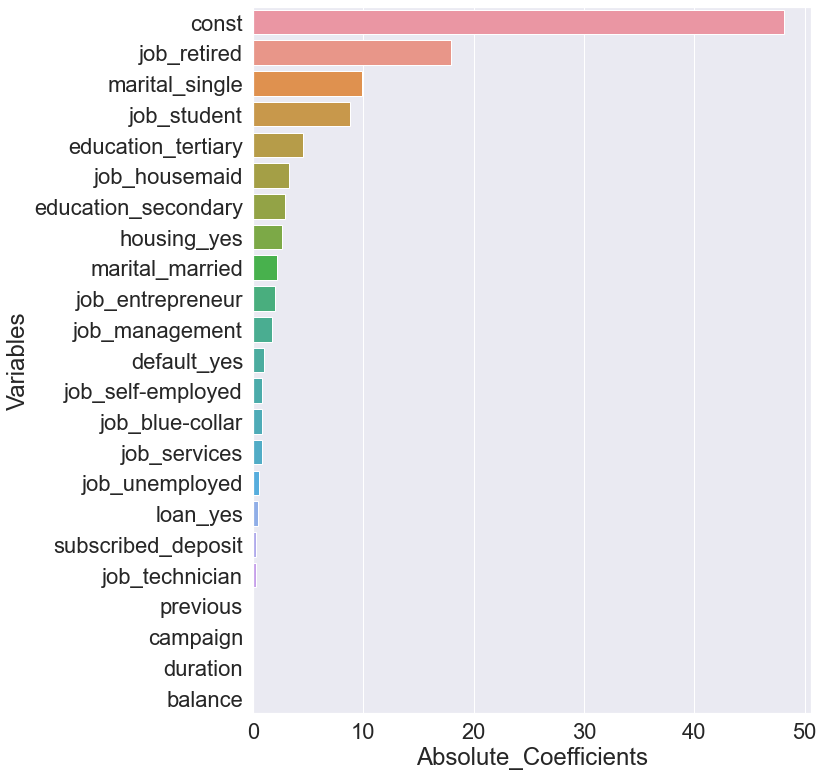

In [9]:
Basic_Linear_Regression(df=cleaned_data, target_col_name='age', test_size=0.1)

# Validate Linear Regression
[Go back to the Table of Contents](#Contents)

In [10]:
import sklearn
import statsmodels.api as sm
import seaborn as sns
sns.set(rc={'figure.figsize':(10,13)}, font_scale = 2)

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import numpy as np

def Linear_Regression_Test(df, target_col_name, numeric_column_list, test_size):

    #Split Data into training and testing groups
    #We will have to standardize the numeric independent variables    
    cleaned_data_y = df.loc[:, df.columns == target_col_name]
    cleaned_data_x = df.loc[:, df.columns != target_col_name]

    x_train, x_test, y_train, y_test = train_test_split(cleaned_data_x, cleaned_data_y, test_size=test_size, random_state= 1254)

    scalar = sklearn.preprocessing.StandardScaler()

    scalar_x_train_numeric = pd.DataFrame(scalar.fit_transform(x_train[numeric_column_list]), index=x_train[numeric_column_list].index, columns=numeric_column_list)
    scalar_x_test_numeric = pd.DataFrame(scalar.transform(x_test[numeric_column_list]), index = x_test.index, columns=numeric_column_list)

    #Merge standardized numerical independent variables with categorical independent variables
    x_train_complete = pd.merge(scalar_x_train_numeric, x_train[x_train.columns.difference(numeric_column_list)], how = 'left', left_index=True, right_index=True)
    x_test_complete = pd.merge(scalar_x_test_numeric, x_test[x_test.columns.difference(numeric_column_list)], how = 'left', left_index=True, right_index=True)
    
    model = LinearRegression()
    model.fit(x_train_complete, y_train)
    
    lasso_params = {'alpha':np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])}
    ridge_params = {'alpha':np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])}
    
    Lasso_CV = GridSearchCV(linear_model.Lasso(), 
                            param_grid=lasso_params, scoring='neg_mean_squared_error', cv=int((1/test_size))).fit(x_train, y_train)
    print('Average Training Lasso RMSE Score With best Penalty: ', abs(Lasso_CV.best_score_)**0.5)
    print('\n')

    print('Best Lasso Penalty:', Lasso_CV.best_estimator_.get_params()['alpha'])
    print('\n')
    
    Ridge_CV = GridSearchCV(linear_model.Ridge(), 
                            param_grid=ridge_params, scoring='neg_mean_squared_error', cv=int((1/test_size))).fit(x_train, y_train)
    print('Best Training Ridge RMSE Score With best Penalty: ', abs(Ridge_CV.best_score_)**0.5)
    print('\n')
    print('Best Ridge Penalty:', Ridge_CV.best_estimator_.get_params()['alpha'])
    print('\n')
    
    model_OLS = sm.OLS(y_train, x_train)
    results_fu = model_OLS.fit()

    results_fr = model_OLS.fit_regularized(L1_wt=1.0, alpha=Lasso_CV.best_estimator_.get_params()['alpha'], start_params=results_fu.params)
    results_fr_fit = sm.regression.linear_model.OLSResults(model_OLS, results_fr.params, model_OLS.normalized_cov_params)

    final = sm.regression.linear_model.OLSResults(model_OLS, results_fr.params, model_OLS.normalized_cov_params)
    print('Best Lasso Results:')
    print('\n')
    print(final.summary())

    Best_Lasso_Coefficients = pd.DataFrame(final.params)
    Best_Lasso_Coefficients.reset_index(inplace=True)
    Best_Lasso_Coefficients.rename(columns={"index": "Variables", 0: "Coefficients"}, inplace=True)
    Best_Lasso_Coefficients.sort_values(by=["Coefficients"], ascending=False, inplace=True)

    Feature_Importance_Lasso = sns.barplot(x="Coefficients", y="Variables", data=Best_Lasso_Coefficients)
    return Feature_Importance_Lasso

### Best Lasso Model RMSE, Coefficients, and Feature Importance

Average Training Lasso RMSE Score With best Penalty:  8.182822279914618


Best Lasso Penalty: 0.0001


Best Training Ridge RMSE Score With best Penalty:  8.182819528767322


Best Ridge Penalty: 1.0


Best Lasso Results:


                                 OLS Regression Results                                
Dep. Variable:                    age   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                          2.035e+04
Date:                Fri, 01 Jan 2021   Prob (F-statistic):                        0.00
Time:                        14:04:46   Log-Likelihood:                     -1.5835e+05
No. Observations:               40430   AIC:                                  3.168e+05
Df Residuals:                   40408   BIC:                                  3.169e+05
Df Model:                          22                                     

<AxesSubplot:xlabel='Coefficients', ylabel='Variables'>

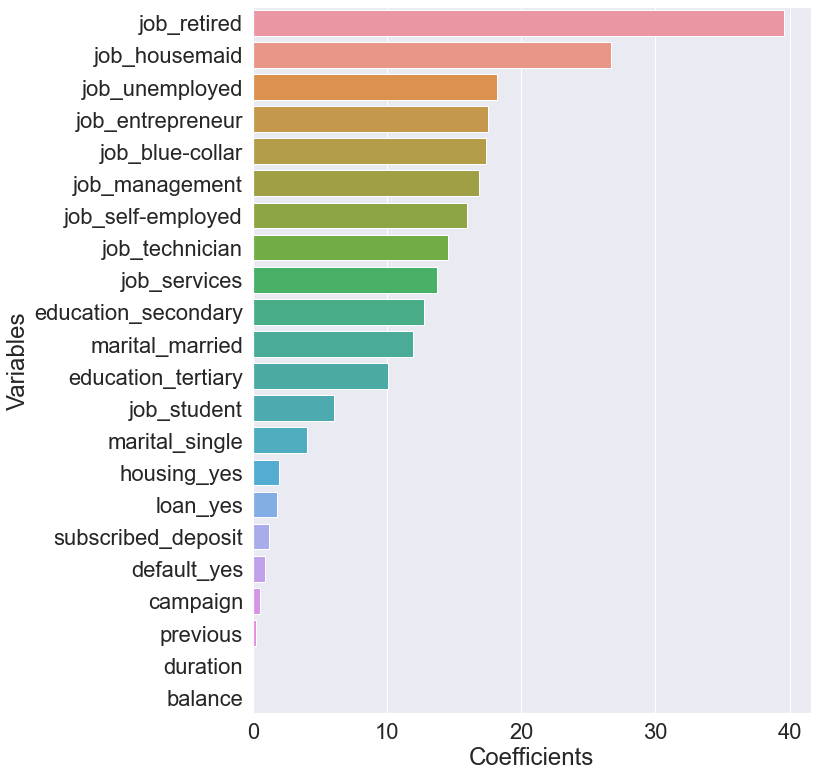

In [11]:
Linear_Regression_Test(cleaned_data, 'age', ['balance', 'campaign', 'duration'], 0.1)

# Logistic Regression
[Go back to the Table of Contents](#Contents)



Accuracy of logistic regression classifier on test set: 0.8923


Optimization terminated successfully.
         Current function value: 0.280880
         Iterations 8


                           Logit Regression Results                           
Dep. Variable:     subscribed_deposit   No. Observations:                40430
Model:                          Logit   Df Residuals:                    40408
Method:                           MLE   Df Model:                           21
Date:                Fri, 01 Jan 2021   Pseudo R-squ.:                  0.2246
Time:                        14:04:47   Log-Likelihood:                -11356.
converged:                       True   LL-Null:                       -14645.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                  

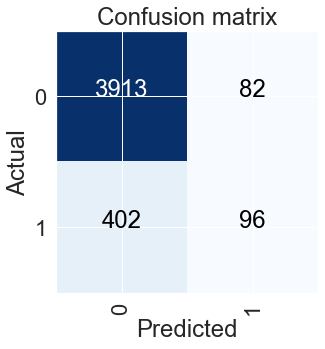

In [12]:
#Prints accuracy of normal logistic regression and coefficient values after scaling

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix

def Basic_Logistic_Regression(cleaned_data, target_col_name, numeric_column_list, test_size):

    #Split Data into training and testing groups
    #We will have to standardize the numeric independent variables    
    cleaned_data_y = cleaned_data.loc[:, cleaned_data.columns == target_col_name]
    cleaned_data_x = cleaned_data.loc[:, cleaned_data.columns != target_col_name]

    x_train, x_test, y_train, y_test = train_test_split(cleaned_data_x, cleaned_data_y, test_size=test_size, random_state= 1254)

    scalar = sklearn.preprocessing.StandardScaler()

    scalar_x_train_numeric = pd.DataFrame(scalar.fit_transform(x_train[numeric_column_list]), index=x_train[numeric_column_list].index, columns=numeric_column_list)
    scalar_x_test_numeric = pd.DataFrame(scalar.transform(x_test[numeric_column_list]), index = x_test.index, columns=numeric_column_list)

    #Merge standardized numerical independent variables with categorical independent variables
    x_train_complete = pd.merge(scalar_x_train_numeric, x_train[x_train.columns.difference(numeric_column_list)], how = 'left', left_index=True, right_index=True)
    x_test_complete = pd.merge(scalar_x_test_numeric, x_test[x_test.columns.difference(numeric_column_list)], how = 'left', left_index=True, right_index=True)
    
    logreg = LogisticRegression()
    logreg.fit(x_train_complete, y_train)
    y_pred = logreg.predict(x_test_complete)
    print('\n')
    print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(x_test_complete, y_test)))
    print('\n')
    
    model = sm.Logit(y_train, x_train_complete)
    result=model.fit()
    print('\n')
    print(result.summary())
    print('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
    roc = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    print('\n')
    print(roc)
    print('\n')
    
    pvalues_df = pd.DataFrame(result.pvalues)
    pvalues_df.reset_index(inplace=True)
    pvalues_df.rename(columns={"index": "Variables", 0: "Pvalues"}, inplace=True)

    #Creates new dataframe for all significant variables
    df_not_significant = pvalues_df.loc[pvalues_df['Pvalues'] > .05]
    df_not_significant['Pvalues'] = df_not_significant['Pvalues'].apply(lambda x: '%.5f' % x)
    print('Not Significant Variables:')
    print('\n')
    print(df_not_significant)
    print('\n')
    cm = confusion_matrix(y_test, y_pred)
    cm_plot = plot_confusion_matrix(cm, ['0', '1'])
    return cm_plot
    
Basic_Logistic_Regression(cleaned_data, 'subscribed_deposit', ['age','balance', 'campaign', 'duration'], test_size= 0.1)

### Optimum Threshhold

# Validate Logistic Regression
[Go back to the Table of Contents](#Contents)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def Logistic_Regression_Test(penalty_list, target_col_name, numeric_column_list, test_size):
    #Split Data into training and testing groups
    #We will have to standardize the numeric independent variables    
    cleaned_data_y = cleaned_data.loc[:, cleaned_data.columns == target_col_name]
    cleaned_data_x = cleaned_data.loc[:, cleaned_data.columns != target_col_name]

    x_train, x_test, y_train, y_test = train_test_split(cleaned_data_x, cleaned_data_y, test_size=test_size, random_state= 1254)

    scalar = sklearn.preprocessing.StandardScaler()

    scalar_x_train_numeric = pd.DataFrame(scalar.fit_transform(x_train[numeric_column_list]), index=x_train[numeric_column_list].index, columns=numeric_column_list)
    scalar_x_test_numeric = pd.DataFrame(scalar.transform(x_test[numeric_column_list]), index = x_test.index, columns=numeric_column_list)

    #Merge standardized numerical independent variables with categorical independent variables
    x_train_complete = pd.merge(scalar_x_train_numeric, x_train[x_train.columns.difference(numeric_column_list)], how = 'left', left_index=True, right_index=True)
    x_test_complete = pd.merge(scalar_x_test_numeric, x_test[x_test.columns.difference(numeric_column_list)], how = 'left', left_index=True, right_index=True)

    logreg = LogisticRegression()
    grid={"C":np.array(penalty_list), "penalty":["l1"]}
    logreg_cv=GridSearchCV(logreg,grid,cv=5)
    logreg_cv.fit(x_train,y_train)
    
    print('The Best Penalty:', logreg_cv.best_estimator_.get_params()['penalty'])
    print('The Best C:', logreg_cv.best_estimator_.get_params()['C'])

    logreg2 = LogisticRegression(penalty='l1', C=logreg_cv.best_estimator_.get_params()['C'])
    logreg2.fit(x_train_complete, y_train)
    THRESHOLD = 0.5
    preds = np.where(logreg2.predict_proba(x_test_complete)[:,1] > THRESHOLD, 1, 0)
    print('Accuracy : {:.4f}'.format(accuracy_score(y_test, preds)))
    
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, preds, average='macro')

    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('Fscore: {}'.format(fscore))
    
    cm_lasso = confusion_matrix(y_test, preds)
    cm_confusion_matrix = plot_confusion_matrix(cm_lasso, classes=['0','1'], normalize=False)
    
    print("Evaluate Model Threshold")
    a = logreg2.predict_proba(x_test_complete)[:,1]
    bins = np.arange(0, 1, 0.005).tolist()
    # plt.hist(a, bins)
    # plt.title("histogram") 
    # plt.show()

    accuracy=[]
    for i in range(0,100):
        preds = np.where(logreg2.predict_proba(x_test_complete)[:,1] > (0.01 * i), 1, 0)
        accuracy.append(accuracy_score(y_test, preds))

    fig, (ax1, ax2) = plt.subplots(2)
    ax1.hist(a, bins)
    ax1.set_title('Prediction Probability Histogram')
    ax2.bar(list(range(0,100)), accuracy, label="Threshhold Accuracy")
    ax2.set_title('Model Accuracy at Thresholds 0.00-1.00')

    ##Highest Accuracy Threshold

    print('Threshold for highest accuracy:', accuracy.index(max(accuracy)), 'Accuracy:', max(accuracy))

The Best Penalty: l1
The Best C: 10.0
Accuracy : 0.8923
Precision: 0.7230812295754293
Recall: 0.5861227136330052
Fscore: 0.6128902940066506
Evaluate Model Threshold
Threshold for highest accuracy: 47 Accuracy: 0.8933897173380815


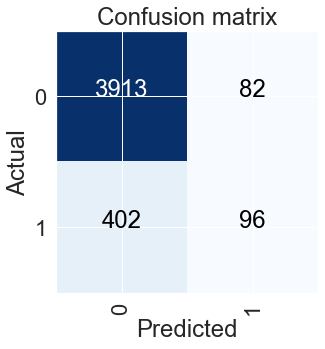

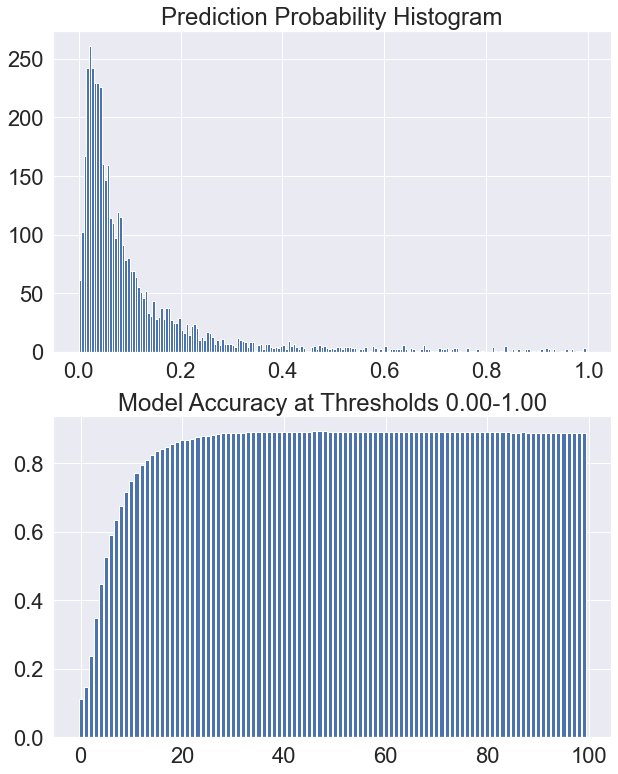

In [14]:
Logistic_Regression_Test([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'subscribed_deposit', ['age','balance', 'campaign', 'duration'], 0.1)

In [15]:
x['x'] = pd.DataFrame(logreg.predict_proba(x_test_complete)[:,1])
for i in range(0,100):
    x['threshold_probs'   + str(0.01 * i)] = np.where(logreg.predict_proba(x_test_complete)[:,1] > (0.01  * i), 1, 0)
    x['accuracy' + str(i)] = accuracy_score(y_test, x[0.01 * i])
#     preds = np.where(logreg.predict_proba(x_test_complete)[:,1] > (0.01 * i), 1, 0)
#     accuracy.append(accuracy_score(y_test, preds))


NameError: name 'logreg' is not defined

In [ ]:
x

In [ ]:
x['x'] = pd.DataFrame(logreg.predict_proba(x_test_complete)[:,1])
x['x2'] =  np.where(logreg.predict_proba(x_test_complete)[:,1] > 0.7, 1, 0)
x

In [ ]:
preds3 = np.where(logreg.predict_proba(x_test_complete))
accuracy_score(y_test, preds3)

In [ ]:
# cleaned_data_y = cleaned_data.loc[:, cleaned_data.columns == 'subscribed_deposit']
# cleaned_data_x = cleaned_data.loc[:, cleaned_data.columns != 'subscribed_deposit']

# x_train, x_test, y_train, y_test = train_test_split(cleaned_data_x, cleaned_data_y, test_size=0.2, random_state= 1254)

# scalar = sklearn.preprocessing.StandardScaler()

# scalar_x_train_numeric = pd.DataFrame(scalar.fit_transform(x_train[['age','balance', 'campaign', 'duration']]), index=x_train[['age','balance', 'campaign', 'duration']].index, columns=['age','balance', 'campaign', 'duration'])
# scalar_x_test_numeric = pd.DataFrame(scalar.transform(x_test[['age','balance', 'campaign', 'duration']]), index = x_test.index, columns=['age','balance', 'campaign', 'duration'])

# #Merge standardized numerical independent variables with categorical independent variables
# x_train_complete = pd.merge(scalar_x_train_numeric, x_train[x_train.columns.difference(['age','balance', 'campaign', 'duration'])], how = 'left', left_index=True, right_index=True)
# x_test_complete = pd.merge(scalar_x_test_numeric, x_test[x_test.columns.difference(['age','balance', 'campaign', 'duration'])], how = 'left', left_index=True, right_index=True)

# logreg = LogisticRegression(penalty='l1', C=1.0)
# logreg.fit(x_train_complete, y_train)

# a = logreg.predict_proba(x_test_complete)[:,1]
# bins = np.arange(0, 1, 0.005).tolist()
# # plt.hist(a, bins)
# # plt.title("histogram") 
# # plt.show()

# accuracy=[]
# for i in range(0,100):
#     preds = np.where(logreg.predict_proba(x_test_complete)[:,1] > (0.01 * i), 1, 0)
#     accuracy.append(accuracy_score(y_test, preds))

# fig, (ax1, ax2) = plt.subplots(2)
# ax1.hist(a, bins)
# ax1.set_title('Prediction Probability Histogram')
# ax2.bar(list(range(0,100)), accuracy, label="Threshhold Accuracy")
# ax2.set_title('Model Accuracy at Thresholds 0.00-1.00')

# ##Highest Accuracy Threshold

# print('Threshold for highest accuracy:', accuracy.index(max(accuracy)), 'Accuracy:', max(accuracy))


# Random Forest
[Go back to the Table of Contents](#Contents)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
# predictions
rfc_predict = rfc.predict(x_test)

In [ ]:
from sklearn.base import clone
import seaborn as sns

def RFC_Feature_Importance(model, x_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(x_train, y_train)
    benchmark_score = model_clone.score(x_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in x_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(x_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(x_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = pd.DataFrame({'Features': x_train.columns, 'Importance' : importances})
    importances_df.sort_values(by= ['Importance'], ascending=False, inplace=True)
    importances_df.reset_index(drop=True, inplace=True)
    
    return importances_df

In [ ]:
importances_df = RFC_Feature_Importance(rfc, x_train, y_train, random_state=42)

In [ ]:
cm2 = confusion_matrix(y_test, rfc_predict)
cm2

In [ ]:
plot_confusion_matrix(cm2, classes=['0','1'], normalize=False)

In [ ]:
##Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rfc_predict)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_test, rfc_predict, average='macro')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [ ]:
Feature_Importance_RFC = sns.barplot(x="Importance", y="Features", data=importances_df)